### Text analysis of musical instruments review

In [23]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [24]:
# reading the csv file

df_review= pd.read_csv('./TextData/amazon-music-reviews 2/Musical_instruments_reviews.csv')

In [25]:
df_review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [26]:
df_review.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [27]:
# slecting the paricular columns

df_review=df_review[[ 'reviewText','overall']]

In [28]:
df_review['reviewText']=df_review['reviewText'].str.replace('\d+',' ')

In [29]:
# checking the distribution of review score

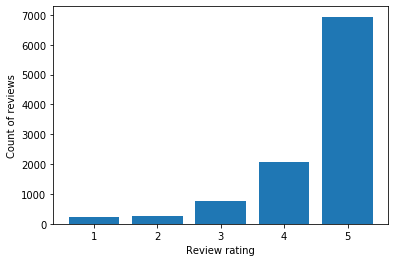

In [30]:
values, counts = np.unique(df_review['overall'], return_counts=True)
plt.figure()
plt.bar(values, counts)
plt.xlabel('Review rating')
plt.ylabel('Count of reviews')
plt.show()

In [31]:
data=df_review

In [32]:
df_review.dtypes

reviewText     object
overall       float64
dtype: object

In [33]:
# using map the Reviewer_Score column converted into a binary column in the following way.

conversion_dict = {0.0:0, 1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1}
df_review['overall'] = df_review['overall'].map(conversion_dict)


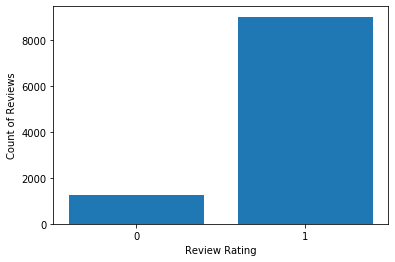

In [34]:

values, counts = np.unique(df_review['overall'], return_counts=True)
plt.figure()
plt.bar(["0","1"], counts)
plt.xlabel('Review Rating')
plt.ylabel('Count of Reviews')
plt.show()

### ***Review ratings are highly skewed*** ###

In [35]:
df_review_1=df_review.loc[df_review['overall']==1]

In [36]:
df_review_1.to_csv('df_review_1.csv')

In [37]:
df_review_0=df_review.loc[df_review['overall']==0]

In [38]:
df_review_0.to_csv('df_review_0.csv')

In [39]:
#pd.options.display.max_rows=9022
df_review_1.head(2)

,reviewText,overall
0,"Not much to write about here, but it does exac...",1
1,The product does exactly as it should and is q...,1


In [40]:
df_review_1['reviewText'].str.isnumeric().sum()

0

In [21]:
df_review_1.dtypes

reviewText    object
overall        int64
dtype: object

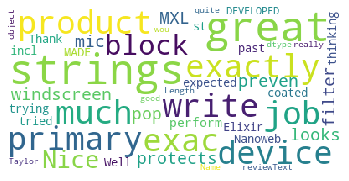

In [46]:
from wordcloud import WordCloud 
# Start with one review:
text = df_review_1['reviewText']
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


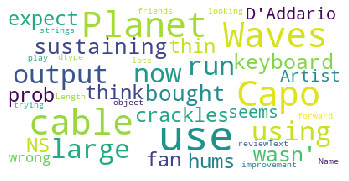

In [47]:
from wordcloud import WordCloud 
# Start with one review:
text = df_review_0['reviewText']
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Count the ratio

In [ ]:
print(counts/np.sum(counts))

In [ ]:
df_review=df_review[['reviewText','overall']]

In [ ]:
# store review data in X and y

X = df_review['reviewText']
y = df_review['overall']

In [ ]:
df_review.loc[df_review['overall']==0]

In [ ]:
# splitting our data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

### Fitting bag-of words model

In [ ]:
# 1. Instantiate
bagofwords = CountVectorizer(
    encoding='utf-8',
    
    token_pattern='(?u)\\b\\w\\w+\\b',
    
    min_df=1,
)

In [ ]:
# 2. Fit
bagofwords.fit(X_train.values.astype('U'))

In [ ]:
# 3. Transform
X_train = bagofwords.transform(X_train.values.astype('U'))
X_train

In [ ]:
# Fitting a model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
score=logreg.score(X_train,y_train)
print(f'printing the Training set score:{score}')

In [ ]:
X_test = bagofwords.transform(X_test.values.astype('U'))
X_test

In [ ]:
# Test Score
score=logreg.score(X_test,y_test)
print(f'printing the Testing set score:{score}')

### Improving our Model

This accuracy can be improved.

First, let's look at the most frequently occurring words in our dataset.

In [ ]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
word_counts

In [ ]:
words = np.array(bagofwords.get_feature_names())
words

In [ ]:
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})

words_df.sort_values(by="count", ascending=False).head(10)

Well those are not very useful...
These words that will appear in almost any sentence are called "stop words." They are words which add no meaning to the sentence. We can actually filter them out, so let's do that.

We will have to re-build our training and test data.

In [ ]:
# Re-building train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We will now use the same `CountVectorizer()` function, but add in an argument which takes away common stop words.

### Building the model by removing stop words

In [ ]:
bagofwords2 = CountVectorizer(stop_words="english")
bagofwords2.fit(X_train.values.astype('U')
               )
X_train = bagofwords2.transform(X_train.values.astype('U')) 
X_test = bagofwords2.transform(X_test.values.astype('U')) 

In [ ]:
X_train

### We have reduces the number of features from 396956 to 231334. What are the most common words now?
### Let us find out!

In [ ]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords2.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

In [ ]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)


In [ ]:
# Test Score
logreg.score(X_test,y_test)

The accuracy went down slightly, but we've also reduced the number of words we are using. This can be important because as we use less words we will use up less space, our models will run faster, and if the accuracy is still acceptable we could actually make huge gains in how fast we can prototype different models.

### Removing Infrequent Words

`CountVectorizer` also allows us to remove infrequent words which occur in a small collection of documents. This can be useful for two reasons:

1. If someone wrote a certain actor is "an utter failure" and their review is bad, it makes sense. But is that really a trend our models should pay attention to?
2. There may be a large group of words that each appear in only several documents. Ignoring those words reduces our memory and run-time consumption even more, allowing us to do faster processing on laptops and desktops.

In our vectorizer, we can add a `min_df` parameter to exclude anything that occurs below this frequency:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords3 = CountVectorizer(stop_words="english", min_df = 10)
bagofwords3.fit(X_train.values.astype('U'))
X_train = bagofwords3.transform(X_train.values.astype('U'))
X_test = bagofwords3.transform(X_test.values.astype('U'))

In [ ]:
X_train

#### We have dropped the number of words down to 201472!

In [ ]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)


In [ ]:
# Test Score
logreg.score(X_test,y_test)

This is slightly lower, but again we will have to consider if the smaller matrix and faster processing are worth the reduction. This will be a case-by-case consideration.

From this new data, let's try and pull the most important words. We know that in a logistic regression, the most important words will have high coefficients, and the least important will have the lowest (since every feature is on the same scale).

From this new data, let's try and pull the most important words. We know that in a logistic regression, the most important words will have high coefficients, and the least important will have the lowest (since every feature is on the same scale).

Let's grab all the coefficients

In [ ]:
coefficients = logreg.coef_
coefficients

Now let's get the highest and lowest coefficients.

In [ ]:
indices = coefficients.argsort()[0]

In [ ]:
indices

In [ ]:
# The words with the lowest coefficients 
# most predictive of a 0 (negative review)
np.array(bagofwords3.get_feature_names())[indices[:20]]

In [ ]:
# The words with the highest coefficients
# most predictive of a 1 (positive review)
np.array(bagofwords3.get_feature_names())[indices[-20:]]

So, we have some strong predictors!

### Stemming and Lemmatization

In language, we often use variations on the same word or meaning: run, runs, running, ran, jogged, jogging, jogs...... These should probably all be coded as the same word.

You might have noticed during our vectorizing we removed the punctuation and capitals by default - this is part of the normalization process.

Stemming is syntax independent way of cutting off 's', 'ing' and so on - there are various strategies for carrying this out. These are obviously language specific!

We will use the Porter Stemmer from [nltk](http://www.nltk.org/howto/stem.html), one of the most widely used NLP packages. 

In [ ]:
import nltk

In [ ]:
# Let's test it out
stemmer = nltk.stem.PorterStemmer()

We can see exactly what the `PorterStemmer()` function above. Let's now apply it to our data. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords4 = CountVectorizer(min_df=5, 
                              tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                              stop_words='english')
bagofwords4.fit(X_train.values.astype('U'))

X_train = bagofwords4.transform(X_train.values.astype('U'))
X_test = bagofwords4.transform(X_test.values.astype('U'))

In [ ]:
X_train

In the above bag-of-words model, we are actually changing the tokenizer itself. Rather than having the tokens be the unique words, we are adding stemming in the process. 

In [ ]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)


In [ ]:
# Test Score
logreg.score(X_test,y_test)

In [ ]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords4.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

Notice this time we got some strange results such as punctuation marks, and some other unclear words. We should design our own tokenizer to better deal with these issues which we pass into `CountVectorizer`.

In [ ]:
import string
print(string.punctuation)

In [ ]:
# A sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# After splitting the text based on spaces
# We stem and remove punctuation
for word in sentence.split(' '):
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    print(stemmed_word)

In [ ]:
# A sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# After splitting the text based on spaces
# We stem and remove punctuation
for word in sentence.split(' '):
    stemmed_word = stemmer.stem(word)
    for punctuation_mark in string.punctuation:
        stemmed_word = stemmed_word.replace(punctuation_mark, '')
    print(stemmed_word)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            #stemmed_word = word
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [ ]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

In [ ]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords5 = CountVectorizer(min_df=5, tokenizer=my_tokenizer)
bagofwords5.fit(X_train.values.astype('U'))
X_train = bagofwords5.transform(X_train.values.astype('U'))
X_test = bagofwords5.transform(X_test.values.astype('U'))

In [ ]:
X_train

We have 2125 tokens now, but notice that the cell took a few seconds to run. So even a slightly more advanced bag-of-words model is already taking a bit more time to run.

In [ ]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords5.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

Our most common words might not make a lot of sense and some are cut off, but at least they are not stop words or punctuation. Let's see how our model will do. 

In [ ]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)


In [ ]:
# Test Score
logreg.score(X_test,y_test)

Not bad! We get clean tokens and the performace has not decreased too much from using our original bag-of-words transformed data. 

#### Lemmatization

Lemmatization is similar to stemming but with one difference; When stemming words to their root form, the stem is not guaranteed to be a proper word in the source language (in our case, English), as we saw above. Lemmatization ensures the roots extracted from words (called Lemmas) are proper words.

This can easily be implemented using pre-made functions in `nltk` or other NLP packages. We will not implement it here

### N-grams

As well as single words, we can start to put in multiple combinations of words into the bag. This will explode out feature space but should lead to better fitting models: "not great" is a lot more informative than "not" and "great".

Two-grams in the following toy sentence:

`the turtle is not fast`

would be: 

`the turtle`

`turtle is`

`is not`

`not fast`


These n-grams usually get added as tokens to our document-term matrix. So the tokens for the above sentence (without other processing) would be:

`the` `turtle` `is` `not` `fast`
`the turtle`
`turtle is`
`is not`
`not fast`. 



To do this in Python, we can pass an argument `ngram_range` into our vectorizer:

In [ ]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

bagofwords6 = CountVectorizer(min_df=5, tokenizer=my_tokenizer, 
                              ngram_range = (1,3))
bagofwords6.fit(X_train.values.astype('U'))
X_train = bagofwords6.transform(X_train.values.astype('U'))
X_test = bagofwords6.transform(X_test.values.astype('U'))

In [ ]:
X_train

We have 2362 tokens now, (it was previously 2125), so we ended up adding some tokens, hopefully they are the 2 or 3 grams. 

In [ ]:
word_counts = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(bagofwords6.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(10)

We see that nothing changed in terms of the most common tokens. You will try to find all of the n-grams in the exercise below. For now let's see how our model is doing on this data. 

In [ ]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)


In [ ]:
# Test Score
logreg.score(X_test,y_test)

We get a slight increase! It seems like adding the n-grams has provided some information to our model.

In [ ]:
words = np.array(bagofwords6.get_feature_names())
# https://stackoverflow.com/questions/38974168/finding-entries-containing-a-substring-in-a-numpy-array
indices_of_23_grams = np.flatnonzero(np.core.defchararray.find(words, " ") != -1)
words[indices_of_23_grams]

In [ ]:
coefficients = logreg.coef_[0]
words = np.array(bagofwords6.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "coef":coefficients})
words_df.sort_values(by="coef", ascending=False, inplace=True)
words_df.reset_index(inplace=True, drop=True)
words_df.head()

In [ ]:
n_grams_df = words_df[words_df['word'].str.contains(' ')]
n_grams_df.head()

In [ ]:
n_grams_df.reset_index(inplace=True)
n_grams_df.head()

In [ ]:
n_grams_df.rename({"index":"position"}, axis=1, inplace=True)
n_grams_df.head()

In [ ]:
# distribution of positions of n_grams, they are mostly in the middle with a slight
# bump in the end 
plt.figure()
plt.hist(n_grams_df['position'], bins=50)
plt.show()

### TF-IDF Vectorization

Using our `CountVectorizer` and `min_df`, we've only enforced that words that appear in less than 5 documents should be discarded, while all other words are kept. In essence we are saying that words that appear less frequently may not be so important.

There is, however, also the argument that words that appear infrequently are VERY important. Using either "good" or "bad" might be very common, but more uncommon words like "terrific" or "atrocious" should be given more weight.  

For this purpose we have the TF-IDF Vectorizer, which is composed of multiplying the following: 

1. Term Frequency (TF) - Which is the number of times a given word appears in a document (review).
2. Inverse Document Frequency - Inverse of the number of documents (reviews) a given word appears in.


Assuming we have a collection of terms $[t_1, t_2, t_3, ..., t_n]$, and a collection of documents $D = [d_1, d_2, d_3, ... d_m]$ The overall formula for a TF-IDF score is:

$$TF-IDF(t_i, d_j) = TF(t_i, d_j) \times IDF(t_i, D)$$

Where:
* $TF(t_i, d_j)$ is the term frequency of term $i$ in document $j$. in the simples case it is:
$$count(t_i)$$
* $IDF(t_i, D)$ is the inverse document frequency of term $i$ in all documents. In the simplest case it is:
$$\frac{len(D)}{len(\{\text{all $d_k$ such that $t_i \in d_k$} \})+1}$$

In simple words, instead of our document-term matrix containing just the count of each token, it now contains a weight. 

- Words that are very common are going to have their count be scaled down 
- Words that are less common are going to have their count be scaled up

That way, when any model is trying to learn whether a word is predictive of sentiment, it will put more focus on the less common words.

In `sklearn`, we can use this vectorizer with the `TfidfVectorizer` function.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

The `sklearn` implementation uses a more complex IDF count, so we will not get into the math of these numbers, but it is very customizable so feel free to look at the documentation.

Notice that while for the `CountVectorizer` the word "absolutely" got a value of 1 for all three documents, the `TfidfVectorizer` gave it a higher value for a short review (it makes up a bigger part of that sentence).

Also notice that while for the `CountVectorizer`, the value for the word "period" is 1, the same value as for the words "movie", "beaten", and "have", the `TfidfVectorizer` gave it the highest value since it only appears in one document.

Let's see how our model does when using TF-IDF transformed data compared to the bag-of-words transformed data.

### Putting it all Together


Let's try out our final model on the test set:

In [ ]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tfidf = TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3))
tfidf.fit(X_train.values.astype('U'))
X_train = tfidf.transform(X_train.values.astype('U'))
X_test = tfidf.transform(X_test.values.astype('U'))

In [ ]:
X_train

In [ ]:
word_weights = np.array(np.sum(X_train, axis=0)).reshape((-1,))
words = np.array(tfidf.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "weight":word_counts})
words_df.sort_values(by="weight", ascending=False).head(10)

There is some difference in which tokens become more important.

In [ ]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)


In [ ]:
# Test Score
logreg.score(X_test,y_test)

### Remember Our Original Problem?

Recall that originally, we simplified our problem into "good" and "bad" reviews, and got a reasonable performance here. But let's check how this final model performs on the original data with 5 classes.

In [ ]:
# store original data in X and y
X_full = data['reviewText']
y_full = data['overall']

In [ ]:
# using our custom tokenizer in CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.33, random_state=42)

tfidf = TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3))
tfidf.fit(X_train.values.astype('U'))
X_train = tfidf.transform(X_train.values.astype('U'))
X_test = tfidf.transform(X_test.values.astype('U'))

In [ ]:
# fitting a logistic regression model again
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training score
logreg.score(X_train,y_train)


In [ ]:
# Test Score
logreg.score(X_test,y_test)

The score might seem pretty low, but remember that we are trying to classify 5 classes! In order to see what is happening we'll use a confusion matrix. 

In [ ]:
from sklearn.metrics import confusion_matrix

preds = logreg.predict(X_test)

con_mat = confusion_matrix(y_test,preds)
con_mat

In [ ]:
from sklearn.metrics import classification_report
cv_report = classification_report(y_test,preds,target_names = ['0','1','2','3','4'])
print(cv_report)

In [ ]:
# making the confusion matrix a bit more clear

df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 0','Predicted 1','Predicted 2','Predicted 3','Predicted 4'],
                 index = ['Actual 0','Actual 1','Actual 2','Actual 3','Actual 4'])

df_con_mat

In [ ]:
# heat map
plt.figure(figsize = (10,10))
sns.heatmap(df_con_mat,cmap= "Blues",annot = True, fmt='')